https://github.com/openai/openai-cookbook/blob/main/examples/Clustering.ipynb

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../src/tmp/embedding/conversation-embeddings.csv')

# Convert to a list of strings of floats
df.embedding = df.embedding.apply(eval).apply(np.array)

In [6]:
from sklearn.cluster import KMeans

matrix = np.vstack(df.embedding)
n_clusters = 20

kmeans = KMeans(
	n_clusters = n_clusters, 
	init='k-means++',
	n_init=10,
	random_state=42
)
kmeans.fit(matrix)
df['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Transcription K-means clusters in 2D using t-SNE')

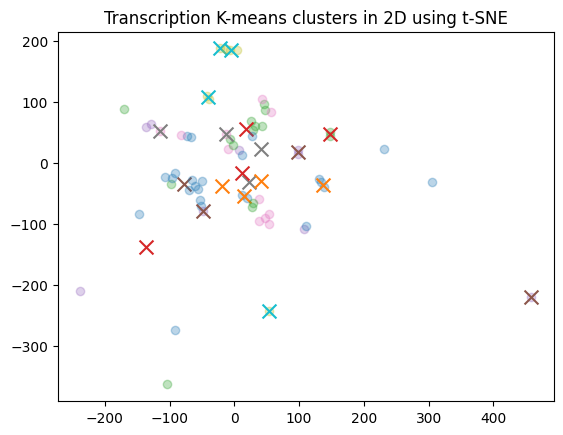

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(
	n_components=2, 
	perplexity=1, 
	random_state=42, 
	learning_rate="auto"
)
vis_dims2 = tsne.fit_transform(
	X=matrix
)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for cluster in range(n_clusters):
    xs = np.array(x)[df.cluster == cluster]
    ys = np.array(y)[df.cluster == cluster]
    plt.scatter(xs, ys, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", s=100)
plt.title("Transcription K-means clusters in 2D using t-SNE")

In [8]:
videos_by_cluster = df.groupby('cluster')['name'].agg(list).reset_index()
videos_by_cluster['count'] = videos_by_cluster['name'].apply(len)
videos_by_cluster = videos_by_cluster.sort_values(
    by=['count'], 
		ascending=False
)
videos_by_cluster

,cluster,name,count
5,5,"[bbc_news-5, cnn-10, cnn-12, cnn-5, cnn-7, cnn...",18
1,1,"[bbc_news-0, bbc_news-4, cnn-11, dw_news-0, dw...",7
8,8,"[cnn-0, cnn-1, cnn-2, cnn-6, cnn-9, dw_news-3,...",7
2,2,"[bbc_news-3, cnn-3, dw_news-7, guardian_news-0...",5
11,11,"[bbc_news-2, dw_news-2, insider_news-2, todayo...",4
19,19,"[the_hot_box-3, the_hot_box-5, todayonline-5]",3
16,16,"[nbc_news-2, the_hot_box-9]",2
15,15,"[the_hot_box-14, the_hot_box-15]",2
12,12,"[bbc_news-1, insider_news-3]",2
0,0,"[todayonline-2, todayonline-3]",2


In [9]:
videos_by_cluster['name'].iloc[0]

['bbc_news-5',
 'cnn-10',
 'cnn-12',
 'cnn-5',
 'cnn-7',
 'cnn-8',
 'dw_news-4',
 'dw_news-5',
 'dw_news-6',
 'dw_news-8',
 'forbes_breaking_news-0',
 'nbc_news-1',
 'the_hot_box-11',
 'the_hot_box-12',
 'the_hot_box-13',
 'the_hot_box-8',
 'todayonline-4',
 'todayonline-6']

In [31]:
import os

for row in videos_by_cluster.itertuples():
  for file in row.name:
    path = "../src/tmp/stripped-conversation/" + file + ".txt"
    if os.path.exists(path):
        with open(path, "r") as f:
            print(file)
            print(f.read())

bbc_news-5
Well, Jasmine Enberg is a principal analyst at social media in Insider Intelligence. And I put it to her that since there's no evidence that TikTok has passed data on to the Chinese government, how does the chief executive go about proving a negative? It was incredibly tough questioning, and there was very, very little that Chu could say to sway U.S. lawmakers' minds. He really had to prove a negative, that TikTok isn't or can't be used by the Chinese Communist Party to influence U.S. public opinion. In that sense, it's not just about data privacy. It's about soft influence and the type of content that is served on TikTok. How important is TikTok to American consumers and American businesses? It's becoming incredibly important. There is a lot of creators who have built their brands and built their businesses on tick tock and who would be severely impacted if the app were to be banned here. That said a lot of creators are prepared for the potential of a ban. They're already u